<a href="https://colab.research.google.com/github/AshTheFallen/Irish-energy/blob/main/Preprocessing_Irish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from google.colab import files

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/gdrive/MyDrive/datasets/daily-electricity-usage/irish_grid.csv', delimiter = ',')
df.drop(columns=['date'],inplace = True)
df.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1000,0.167,0.050,0.166,0.066,0.072,0.153,0.048,0.162,0.138,0.206,0.059,0.120,0.141,0.058,0.198,0.061,0.110,0.127,0.052,5.050,1.390,0.984,1.262,0.363
1,1000,0.087,0.106,0.130,0.050,0.163,0.050,0.187,0.935,0.079,0.149,0.058,0.174,0.059,0.135,0.100,0.212,0.130,0.069,3.590,0.109,0.185,0.795,0.532,0.319
2,1000,0.218,0.048,0.183,0.090,0.126,0.185,0.211,0.905,0.516,0.262,0.123,0.185,0.064,0.363,0.291,0.659,0.574,0.421,0.500,0.439,0.207,0.081,0.067,0.507
3,1000,0.323,0.050,0.133,0.060,0.145,0.049,0.154,0.443,0.532,0.058,0.140,0.058,0.167,0.058,0.162,0.059,0.162,0.058,3.096,3.265,1.415,0.224,0.276,0.251
4,1000,0.227,0.140,0.057,0.151,0.050,0.133,0.182,0.122,0.086,0.254,1.561,3.031,0.612,0.659,0.710,2.423,0.099,0.110,0.066,0.148,0.098,0.216,0.062,0.109


In [22]:
# calculating mean and std for each user and removing data higher or lower than it
new_values = []
def noise_reduction(user):
  coef = 1  # determining the effectiveness of STD in calculating outliers
  shape = user.shape
  values = user.to_numpy().flatten()
  mean = np.mean(values)
  std = np.std(values)
  upper_band = mean + (coef * std)
  lower_band = mean - (coef * std)
  indexes = np.where(((values<lower_band) | (values>upper_band))==True)
  values[indexes] = np.nan
  values = np.reshape(values,shape)
  values = pd.DataFrame(values)
  values = values.ffill(axis = 1).bfill(axis = 1)
  new_values.append(values)

# noise_reduction(df.loc[df['id'] == 1000])
df.groupby(['id']).apply(lambda x: noise_reduction(x.iloc[:,1:]))

""


In [9]:
# concating newly formed dataframes
final_df = pd.concat(new_values, ignore_index=True)
final_df['id'] = df['id']
final_df.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','id']
final_df= final_df[['id','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]
final_df.to_csv('/content/gdrive/MyDrive/datasets/daily-electricity-usage/irish_grid_hourly_modified.csv')

In [10]:
columns = [str(i) for i in range(0,24)]
final_df['day'] = df[columns].sum(axis = 1)
final_df.drop(columns = [str(i) for i in range(0,24)],inplace = True)
print(final_df.head())

     id     day
0  1000  11.203
1  1000   8.403
2  1000   7.225
3  1000  11.338
4  1000  11.306


(536, 1)


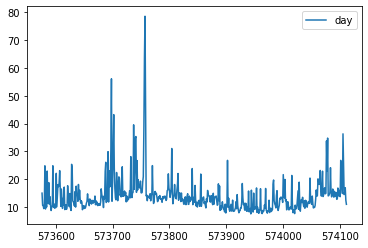

In [14]:
user = final_df.loc[final_df.id == 2121].copy()
user.drop(columns = ['id'],inplace = True)
# print(user.shape)
# user = user.stack()
print(user.shape)
user.plot(kind='line')

In [15]:
# calculating mean and std for each user and removing data higher or lower than it - DAILY
daily_df = final_df
new_values = []
def noise_reduction(user):
  coef = 1  # determining the effectiveness of STD in calculating outliers
  shape = user.shape
  values = user.to_numpy().flatten()
  mean = np.mean(values)
  std = np.std(values)
  upper_band = mean + (coef * std)
  lower_band = mean - (coef * std)
  indexes = np.where(((values<lower_band) | (values>upper_band))==True)
  values[indexes] = np.nan
  values = np.reshape(values,shape)
  values = pd.DataFrame(values)
  values = values.ffill(axis = 0).bfill(axis = 0)
  new_values.append(values)

# noise_reduction(df.loc[df['id'] == 1000])
daily_df.groupby(['id']).apply(lambda x: noise_reduction(x.iloc[:,1]))

""


In [21]:
# concating newly formed dataframes
final_df = pd.concat(new_values, ignore_index=True)
final_df['id'] = daily_df['id']
print(final_df)
final_df.columns = ['0','id']
final_df= final_df[['id','0']]
final_df.to_csv('/content/gdrive/MyDrive/datasets/daily-electricity-usage/irish_grid_daily_modified.csv')

              0    id
0        11.203  1000
1         8.403  1000
2         7.225  1000
3        11.338  1000
4        11.306  1000
...         ...   ...
3301512  32.068  7444
3301513  36.849  7444
3301514  37.185  7444
3301515  36.179  7444
3301516  48.373  7444

[3301517 rows x 2 columns]


(536, 1)


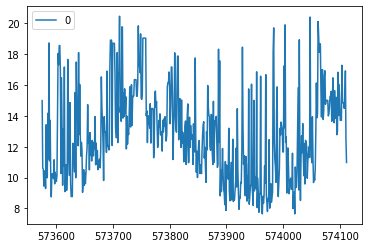

In [20]:
user = final_df.loc[final_df.id == 2121].copy()
user.drop(columns = ['id'],inplace = True)
# print(user.shape)
# user = user.stack()
print(user.shape)
user.plot(kind='line')